In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from seaborn import regression

In [75]:

sns.set(style="whitegrid")


In [108]:
gold_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\Gold For Dollar Prediction 2000-2022.csv")
inflation_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\INFLATION RATE 2000-2022.csv")
unemployment_rate_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\Unemployment Rate 2000-2022.csv")
brend_oil_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\Brent Oil For Dollar Prediction 2000-2019.csv")
euro_usd_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\EUR_USD Historical Data_2000_2019.csv")



# Display basic information about each dataset


## Gold Data Info

In [78]:
gold_data.head()


,Date,High,Low,Currency
0,1/4/2000,289.5,280.0,USD
1,1/5/2000,285.0,281.0,USD
2,1/6/2000,282.8,280.2,USD
3,1/7/2000,284.5,282.0,USD
4,1/10/2000,283.9,281.8,USD


In [79]:
gold_data.tail()

,Date,High,Low,Currency
5698,8/29/2022,1757.90,1731.40,USD
5699,8/30/2022,1752.80,1732.90,USD
5700,8/31/2022,1738.00,1720.60,USD
5701,9/1/2022,1723.00,1699.10,USD
5702,9/2/2022,1729.45,1707.05,USD


In [80]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   High      5703 non-null   float64
 2   Low       5703 non-null   float64
 3   Currency  5703 non-null   object 
dtypes: float64(2), object(2)
memory usage: 178.3+ KB


In [81]:
gold_data.describe()

,High,Low
count,5703.000000,5703.000000
mean,1048.339181,1031.863169
std,522.353946,514.455903
min,259.400000,255.100000
25%,463.900000,457.450000
50%,1198.000000,1179.700000
75%,1392.750000,1368.100000
max,2089.200000,2049.000000


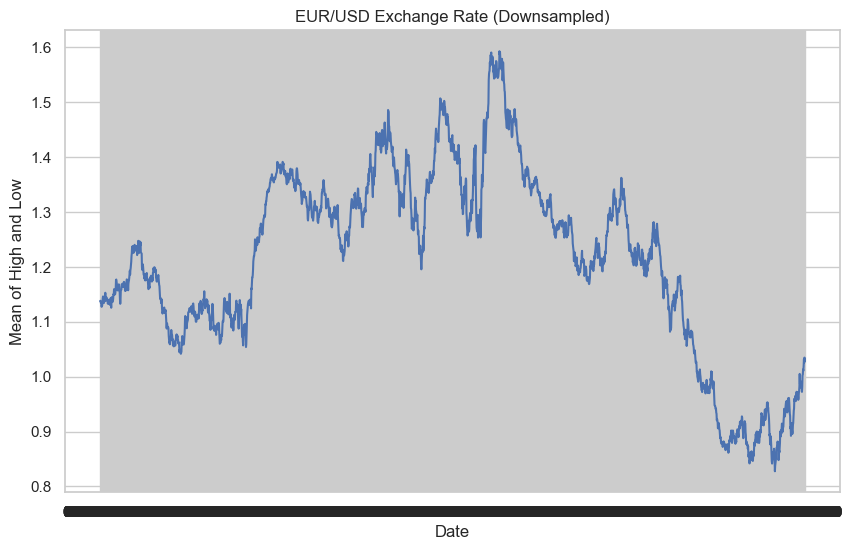

In [87]:
downsampled_data = euro_usd_data.iloc[::2]

# Calculate the mean of 'High' and 'Low' for each row in the downsampled data
mean_values = downsampled_data[['High', 'Low']].mean(axis=1)

# Downsample the 'Date' to match the number of data points in 'mean_values'
downsampled_dates = downsampled_data['Date']

plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('Date')
plt.ylabel('Mean of High and Low')
plt.plot(downsampled_dates, mean_values)

plt.show()

## inflation_data

In [95]:
inflation_data.head()

,DATE,INFLATION RATE
0,01/01/2000,3.376857
1,01/01/2001,2.826171
2,01/01/2002,1.586032
3,01/01/2003,2.270095
4,01/01/2004,2.677237


In [96]:
inflation_data.tail()

,DATE,INFLATION RATE
18,01/01/2018,2.442583
19,01/01/2019,1.812210
20,01/01/2020,1.233584
21,01/01/2021,4.697859
22,01/01/2022,8.002800


In [97]:
inflation_data.describe()

,INFLATION RATE
count,23.000000
mean,2.493215
std,1.664072
min,-0.355546
25%,1.604127
50%,2.270095
75%,3.191393
max,8.002800


In [98]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            23 non-null     object 
 1   INFLATION RATE  23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 500.0+ bytes


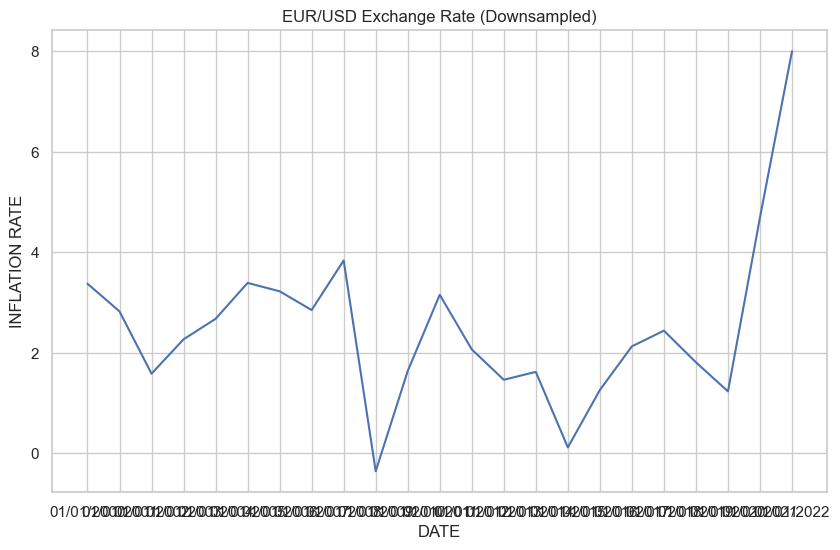

In [99]:
plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('DATE')
plt.ylabel('INFLATION RATE')
plt.plot(inflation_data['DATE'], inflation_data['INFLATION RATE'])


## unemployment rate

In [100]:
unemployment_rate_data.head()

,DATE,UNRATE
0,01/01/2000,4.0
1,01/02/2000,4.1
2,01/03/2000,4.0
3,01/04/2000,3.8
4,01/05/2000,4.0


In [110]:
unemployment_rate_data.tail()

,DATE,UNRATE
271,01/08/2022,3.7
272,01/09/2022,3.5
273,01/10/2022,3.7
274,01/11/2022,3.6
275,01/12/2022,3.5


In [111]:
unemployment_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    276 non-null    object 
 1   UNRATE  276 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [112]:
unemployment_rate_data.describe()

,UNRATE
count,276.000000
mean,5.857971
std,1.959418
min,3.500000
25%,4.400000
50%,5.400000
75%,6.700000
max,14.700000


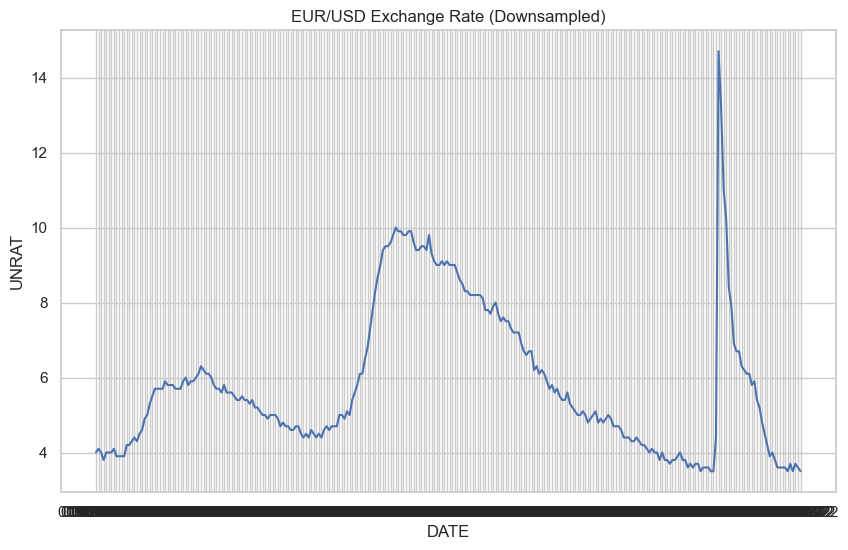

In [113]:
plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('DATE')
plt.ylabel('UNRAT')
plt.plot(unemployment_rate_data['DATE'], unemployment_rate_data['UNRATE'])
plt.show()

## brend oil

In [114]:
brend_oil_data.head()

,Date,High,Low,Change %
0,7/1/2019,66.75,64.22,-2.24%
1,6/28/2019,66.84,66.08,0.00%
2,6/27/2019,66.82,65.63,0.09%
3,6/26/2019,66.85,65.60,2.21%
4,6/25/2019,65.98,64.17,0.29%


In [115]:
brend_oil_data.tail()

,Date,High,Low,Change %
4995,1/10/2000,23.78,23.04,2.77%
4996,1/7/2000,23.98,23.05,-2.24%
4997,1/6/2000,24.22,23.35,-0.46%
4998,1/5/2000,24.37,23.70,-2.71%
4999,1/4/2000,24.70,23.89,-2.75%


In [116]:
brend_oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   High      5000 non-null   float64
 2   Low       5000 non-null   float64
 3   Change %  5000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 156.4+ KB


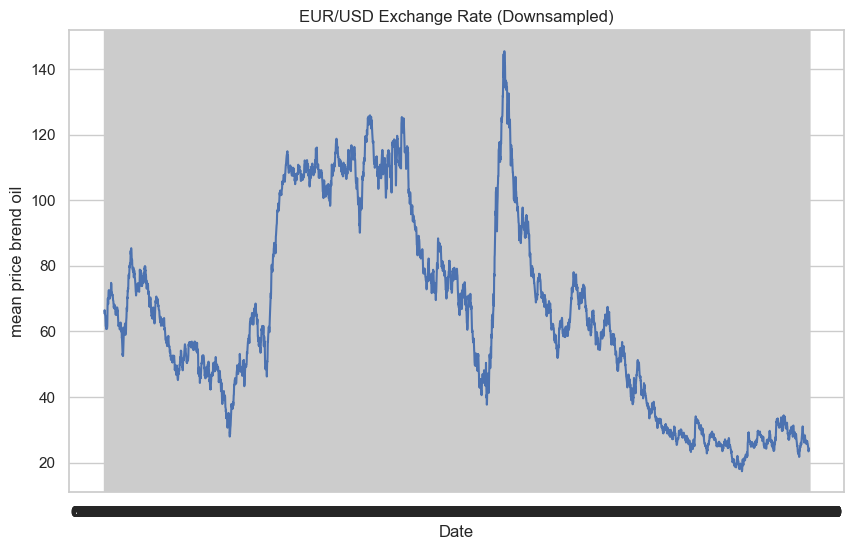

In [118]:

mean_price_brend_oil = brend_oil_data[['High', 'Low']].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('Date')
plt.ylabel('mean price brend oil')
plt.plot(brend_oil_data['Date'], mean_price_brend_oil)
plt.show()

## euro usd

In [119]:
euro_usd_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2019,1.1377,1.1372,1.1410,1.1353,NaN,0.05%
1,02/28/2019,1.1371,1.1371,1.1421,1.1357,NaN,0.02%
2,02/27/2019,1.1369,1.1396,1.1404,1.1360,NaN,-0.16%
3,02/26/2019,1.1387,1.1366,1.1404,1.1343,NaN,0.25%
4,02/25/2019,1.1359,1.1338,1.1369,1.1323,NaN,0.14%


In [120]:
euro_usd_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4995,01/07/2000,1.0292,1.0327,1.0333,1.0252,NaN,-0.31%
4996,01/06/2000,1.0324,1.0325,1.0419,1.0275,NaN,0.08%
4997,01/05/2000,1.0316,1.0295,1.0404,1.0282,NaN,0.04%
4998,01/04/2000,1.0312,1.0244,1.0347,1.0213,NaN,0.46%
4999,01/03/2000,1.0265,1.0052,1.0282,1.0050,NaN,1.89%


In [121]:
euro_usd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


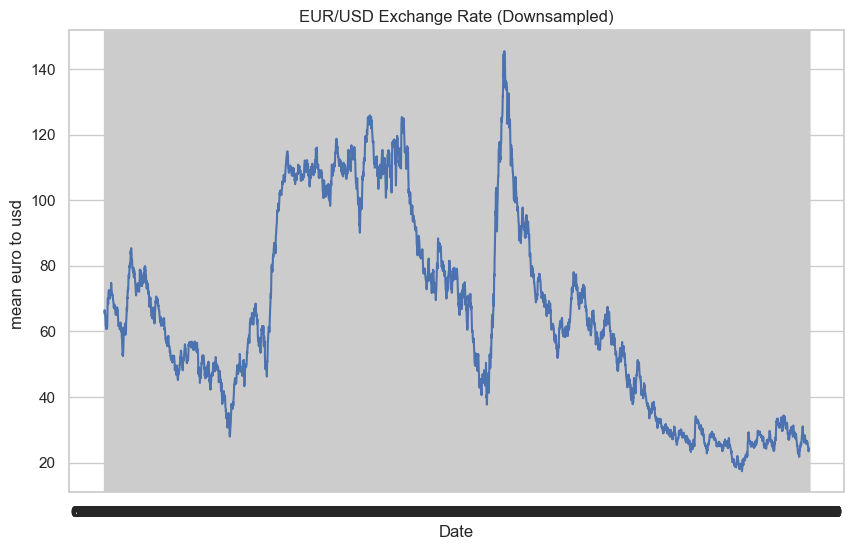

In [122]:

mean_price_brend_oil = brend_oil_data[['High', 'Low']].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('Date')
plt.ylabel('mean euro to usd ')
plt.plot(brend_oil_data['Date'], mean_price_brend_oil)
plt.show()

# data processing

In [135]:
import pandas as pd

# Sample data
data = {
    'DATE': ['01/01/2000', '01/01/2001', '01/01/2002', '01/01/2003', '01/01/2004', '01/01/2018', '01/01/2019', '01/01/2020', '01/01/2021', '01/01/2022'],
    'INFLATION RATE': [3.376857, 2.826171, 1.586032, 2.270095, 2.677237, 2.442583, 1.812210, 1.233584, 4.697859, 8.002800]
}

inflation_data = pd.DataFrame(data)

# Convert the 'DATE' column to a datetime data type with the 'm/d/y' format
inflation_data['DATE'] = pd.to_datetime(inflation_data['DATE'], format='%m/%d/%Y')

# Set the 'DATE' column as the DataFrame index
inflation_data.set_index('DATE', inplace=True)

# Create a date range from the start date (01/01/2000) to the end date (12/31/2022)
date_range = pd.date_range(start='01/01/2000', end='12/31/2022', freq='D')

# Reindex the DataFrame with the date range and fill missing values with forward fill
inflation_data = inflation_data.reindex(date_range, method='ffill')

# Reset the index to make the 'DATE' a regular column
inflation_data.reset_index(inplace=True)

# Print the resulting DataFrame
print(inflation_data)


          index  INFLATION RATE
0    2000-01-01        3.376857
1    2000-01-02        3.376857
2    2000-01-03        3.376857
3    2000-01-04        3.376857
4    2000-01-05        3.376857
...         ...             ...
8396 2022-12-27        8.002800
8397 2022-12-28        8.002800
8398 2022-12-29        8.002800
8399 2022-12-30        8.002800
8400 2022-12-31        8.002800

[8401 rows x 2 columns]


In [130]:
file_path = 'C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\hhhhh.csv'


In [131]:
inflation_data.to_csv(file_path, index=False)
